Importing the required modules

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

# Pre Processing

In [146]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

X = train_data.drop(['SalePrice'], axis = 1)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def preprocess(data):
  le = LabelEncoder()

  data['SF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
  data['Bath'] = data['FullBath'] + 0.5 * data['HalfBath']

  data['Kitchen']= 0
  data['Luxury'] = 0

  for i in data.index:
    if(data['KitchenQual'][i]=='Ex'):
      data['Kitchen'][i]=10
    elif(data['KitchenQual'][i]=='Gd'):
      data['Kitchen'][i]=8
    elif(data['KitchenQual'][i]=='TA'):
      data['Kitchen'][i]=6
    elif(data['KitchenQual'][i]=='Fa'):
      data['Kitchen'][i]=4

    # Luxury - Miscellaneous Features, Fireplace, Pool, CentralAir,  etc.
    if(data['MiscFeature'][i]=='Shed'):
      data['Luxury'][i] += 1
    elif(data['MiscFeature'][i]=='Gar2'):
      data['Luxury'][i] += 1
    elif(data['MiscFeature'][i]=='TenC'):
      data['Luxury'][i] += 2
    elif(data['MiscFeature'][i]=='Othr'):
      data['Luxury'][i] += 1

    if(data['CentralAir'][i] == 'Y'):
      data['Luxury'][i] += 1

    if(data['HeatingQC'][i]=='Ex'):
      data['Luxury'][i]+=1
    elif(data['HeatingQC'][i]=='Gd'):
      data['Luxury'][i]+=0.8
    elif(data['HeatingQC'][i]=='TA'):
      data['Luxury'][i]+=0.6
    elif(data['HeatingQC'][i]=='Fa'):
      data['Luxury'][i]+=0.4
    elif(data['HeatingQC'][i]=='Po'):
      data['Luxury'][i]+=0.2

    data['Luxury'][i] += data['Fireplaces'][i]

  #data.drop(['OverallCond', '1stFlrSF', '2ndFlrSF', 'PoolQC', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'MiscFeature', 'CentralAir', 'Heating', 'HeatingQC', 'Fireplaces', '3SsnPorch', 'LandContour', 'Utilities', 'LandSlope', 'BedroomAbvGr', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF'], axis=1, inplace=True)
  #data.drop(['FireplaceQu', 'BsmtQual', 'TotalBsmtSF', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF'], axis = 1, inplace = True)
  #data.drop(['GrLivArea', 'PoolArea', 'MasVnrType', 'MasVnrArea', 'LotArea', 'LotShape', 'LotConfig', 'LotFrontage', 'MSSubClass', 'BsmtFullBath'], axis = 1, inplace = True)
  #data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'MiscVal', 'GarageCars', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish', 'Alley', 'Street', 'Functional'], axis=1, inplace=True)

  final_params = data[['Id', 'MSSubClass', 'SF', 'TotRmsAbvGrd', 'OverallQual', 'Bath', 'Kitchen', 'GarageArea', 'Luxury']]
  foundation = le.fit_transform(data.Foundation)
  #data.drop(['Foundation'], axis = 1, inplace = True)
  final_params['Foundation'] = foundation

  return final_params

X_train = preprocess(X_train)
X_test = preprocess(X_test)
test_data_processed = preprocess(test_data)

test_data_processed.drop([660, 1116], inplace = True)

Features:-
1. OverallQual
2. Sale Condition
3. Garage Area
4. Total Surface Area
5. Total Rooms above grade
6. Bath
7. KitchenQuality

# Building a model

# Choosing the best value of K

In [147]:
rmse_val = [] #to store rmse values for different k
min_error, K_min = np.Infinity, 0
for K in range(30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    if(error < min_error):
      min_error = error
      K_min = K
    print('RMSE value for k = ' , K , 'is:', error)

RMSE value for k =  1 is: 53362.855128408184
RMSE value for k =  2 is: 48833.70863435876
RMSE value for k =  3 is: 45478.98820851999
RMSE value for k =  4 is: 43491.71800105909
RMSE value for k =  5 is: 40470.9151116365
RMSE value for k =  6 is: 40124.657084771105
RMSE value for k =  7 is: 40238.164474710095
RMSE value for k =  8 is: 40414.44764698808
RMSE value for k =  9 is: 41150.9857754939
RMSE value for k =  10 is: 41555.42072893171
RMSE value for k =  11 is: 42089.79504829143
RMSE value for k =  12 is: 42303.92042227306
RMSE value for k =  13 is: 42409.90124957094
RMSE value for k =  14 is: 42718.45522108837
RMSE value for k =  15 is: 43301.79384532943
RMSE value for k =  16 is: 43600.18616033906
RMSE value for k =  17 is: 43302.72259170818
RMSE value for k =  18 is: 43035.79655989585
RMSE value for k =  19 is: 43506.983857383166
RMSE value for k =  20 is: 43666.253805274435
RMSE value for k =  21 is: 43385.97356635704
RMSE value for k =  22 is: 43672.900900477944
RMSE value for 

<Axes: >

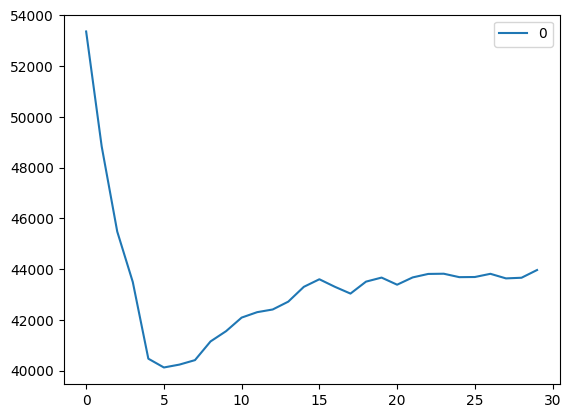

In [148]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [149]:
model = KNeighborsRegressor(n_neighbors = K_min)
model.fit(X_train, y_train)  # fit the model
pred = model.predict(X_test) #make prediction on test set
print(model.score(X_test, y_test))
predictions = pd.DataFrame({
    'Id':X_test.Id,
    'Actual_SalePrice': y_test,
    'Predicted_SalePrice':pred,
})

predictions

0.7704166573294418


,Id,Actual_SalePrice,Predicted_SalePrice
482,483,155000,151108.333333
807,808,223500,205546.666667
470,471,212000,226316.666667
438,439,90350,99583.333333
1103,1104,159500,145350.000000
...,...,...,...
1401,1402,193000,158323.333333
1413,1414,257000,276696.000000
1170,1171,171000,146333.333333
1035,1036,84000,72601.833333


In [150]:
model = KNeighborsRegressor(n_neighbors = K_min)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(test_data_processed) #make prediction on test set
predictions = pd.DataFrame({
    'Id':test_data_processed.Id,
    'SalePrice':pred,
})

predictions

,Id,SalePrice
0,1461,127150.000000
1,1462,166098.333333
2,1463,173440.000000
3,1464,173440.000000
4,1465,176440.000000
...,...,...
1454,2915,114633.333333
1455,2916,118716.666667
1456,2917,168673.333333
1457,2918,108854.166667
